In [2]:
# See benchmark_consts.rs
N_MESSAGES_PER_THREAD = 2 << 15

import numpy as np
import matplotlib.pyplot as plt

In [3]:
thread_counts = [1, 2, 4, 8, 16, 32]


def to_ns(s: str) -> float:
    v = float(s[:-2])
    suffix = s[-2:]
    if suffix == "ns":
        v *= 1
    elif suffix == "μs":
        v *= 1000
    elif suffix == "ms":
        v *= 1000 * 1000
    else:
        v = float(s[:-1])
        v *= 1000 * 1000 * 1000
    return v


mpmc_oq_produce_tp = []
rigtorp_produce_tp = []
mpmc_oq_produce_tp_err = []
rigtorp_produce_tp_err = []

for tc in thread_counts:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[producer")
        ]
        assert len(values) == tc
        return min(values)
    mpmc = []
    rigtorp = []
    for r in range(10):
        with open(f"mpmc_oq_produce_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc.append(get_values_from_file(f))
        with open(f"rigtorp_produce_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp.append(get_values_from_file(f))
    mpmc_oq_produce_tp.append(np.mean(mpmc))
    mpmc_oq_produce_tp_err.append(np.std(mpmc))
    rigtorp_produce_tp.append(np.mean(rigtorp))
    rigtorp_produce_tp_err.append(np.std(rigtorp))
    


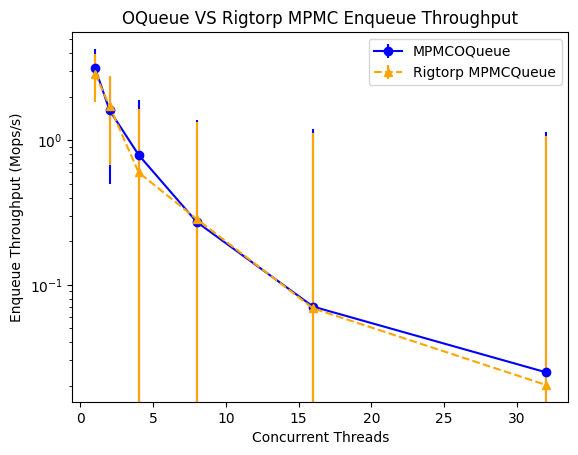

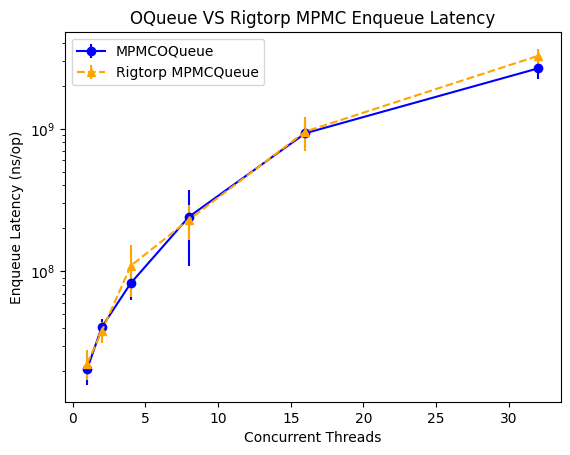

In [4]:
def t(v):
    return N_MESSAGES_PER_THREAD * (10**3) / v
fig = plt.figure()
m = [t(v) for v in mpmc_oq_produce_tp]
r = [t(v) for v in rigtorp_produce_tp]
plt.errorbar(thread_counts, m, yerr=np.std(m), marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, r, yerr=np.std(r), marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Throughput (Mops/s)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Throughput")
plt.show()

fig = plt.figure()
plt.errorbar(thread_counts, mpmc_oq_produce_tp, yerr=mpmc_oq_produce_tp_err, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, rigtorp_produce_tp, yerr=rigtorp_produce_tp_err, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Latency (ns/op)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Enqueue Latency")
plt.show()

In [33]:
mpmc_oq_consume_tp = []
rigtorp_consume_tp = []
mpmc_oq_consume_tp_err = []
rigtorp_consume_tp_err = []

for tc in thread_counts:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[consumer")
        ]
        assert len(values) == tc
        return max(values)
    mpmc = []
    rigtorp = []
    for r in range(10):
        with open(f"mpmc_oq_consume_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc.append(get_values_from_file(f))
        with open(f"rigtorp_consume_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp.append(get_values_from_file(f))
    mpmc_oq_consume_tp.append(np.mean(mpmc))
    mpmc_oq_consume_tp_err.append(np.std(mpmc))
    rigtorp_consume_tp.append(np.mean(rigtorp))
    rigtorp_consume_tp_err.append(np.std(rigtorp))

    print(tc)
    print("  ", mpmc)
    print("  ", np.min(mpmc), np.mean(mpmc), np.max(mpmc))
    print("  ", np.std(mpmc))
    


1
   [2691282.0, 5033457.0, 5192217.0, 4526910.0, 3295687.0, 2815829.0, 3649650.0, 3449974.0, 4919015.0, 3340634.0]
   2691282.0 3891465.5 5192217.0
   892465.007449956
2
   [16561771.0, 11836455.0, 14822236.0, 23089395.0, 19130286.0, 8764443.0, 9866861.0, 16778120.0, 12140820.0, 10779829.0]
   8764443.0 14377021.6 23089395.0
   4306658.218061057
4
   [30008248.0, 32680320.0, 27059572.0, 33141452.0, 27072625.0, 28204391.0, 33962674.0, 18207698.0, 29729143.0, 20212524.0]
   18207698.0 28027864.7 33962674.0
   4992282.064690878
8
   [50934618.0, 61099124.0, 54301327.0, 39282503.0, 43290863.0, 34016752.0, 44112927.0, 45160570.0, 258013924.99999997, 148971587.0]
   34016752.0 77918419.6 258013924.99999997
   67739774.99594554
16
   [86679124.0, 64787161.99999999, 86664051.0, 83826607.0, 1314162874.0, 76694048.0, 677865352.0, 784301029.0, 850484309.0, 159933031.0]
   64787161.99999999 418539758.7 1314162874.0
   427893750.68338
32
   [618438716.0, 122486797.0, 122945064.0, 2986915089.0, 368

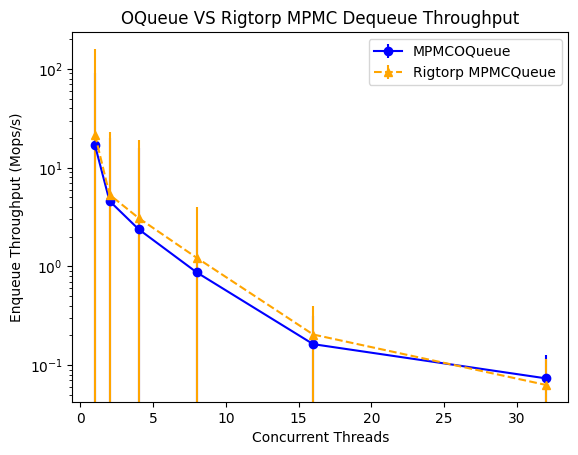

[np.float64(3891465.5), np.float64(14246858.5), np.float64(27534656.9), np.float64(75428297.3875), np.float64(401472720.39375), np.float64(891566301.909375)]
[np.float64(892465.007449956), np.float64(4279775.75514445), np.float64(4861368.568088461), np.float64(67809258.95725057), np.float64(427769586.25708985), np.float64(1215009627.3697112)]


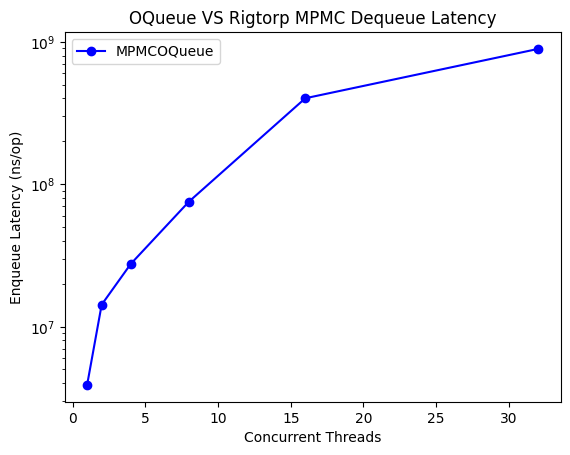

In [30]:
def t(v):
    return N_MESSAGES_PER_THREAD * (10**3) / v
fig = plt.figure()
m = [t(v) for v in mpmc_oq_consume_tp]
r = [t(v) for v in rigtorp_consume_tp]
plt.errorbar(thread_counts, m, yerr=[t(v) for v in mpmc_oq_consume_tp_err], marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts, r, yerr=[t(v) for v in rigtorp_consume_tp_err], marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Throughput (Mops/s)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Throughput")
plt.show()

print(mpmc_oq_consume_tp)
print(mpmc_oq_consume_tp_err)

fig = plt.figure()
plt.errorbar(thread_counts, mpmc_oq_consume_tp, marker='o', label="MPMCOQueue", color="blue")
# plt.errorbar(thread_counts, rigtorp_consume_tp, yerr=rigtorp_consume_tp_err, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Enqueue Latency (ns/op)")
plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Dequeue Latency")
plt.show()

In [7]:
mpmc_oq_mixed_tp = []
rigtorp_mixed_tp = []
mpmc_oq_mixed_tp_err = []
rigtorp_mixed_tp_err = []

for tc in thread_counts[1:]:
    def get_values_from_file(f):
        values = [
            to_ns(line.split()[-1])
            for line in f.readlines()
            if line.startswith("[total")
        ]
        # assert len(values) == tc
        return max(values)
    mpmc = []
    rigtorp = []
    for r in range(10):
        with open(f"mpmc_oq_mixed_bench_throughput_{tc}_run_{r}.log") as f:
            mpmc.append(get_values_from_file(f))
        with open(f"rigtorp_mixed_bench_throughput_{tc}_run_{r}.log") as f:
            rigtorp.append(get_values_from_file(f))
    mpmc_oq_mixed_tp.append(np.mean(mpmc))
    mpmc_oq_mixed_tp_err.append(np.std(mpmc))
    rigtorp_mixed_tp.append(np.mean(rigtorp))
    rigtorp_mixed_tp_err.append(np.std(rigtorp))
    


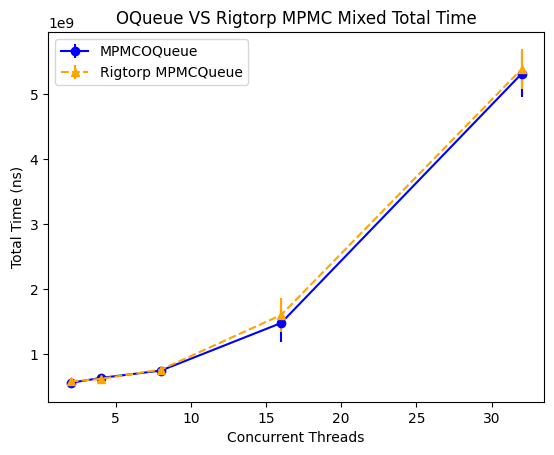

In [9]:
fig = plt.figure()
plt.errorbar(thread_counts[1:], mpmc_oq_mixed_tp, yerr=mpmc_oq_mixed_tp_err, marker='o', label="MPMCOQueue", color="blue")
plt.errorbar(thread_counts[1:], rigtorp_mixed_tp, yerr=rigtorp_mixed_tp_err, marker='^', linestyle='--', label="Rigtorp MPMCQueue", color="orange")
plt.legend()
plt.ylabel("Total Time (ns)")
# plt.yscale("log")
plt.xlabel("Concurrent Threads")
plt.title("OQueue VS Rigtorp MPMC Mixed Total Time")
plt.show()